# Morphological Operators

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

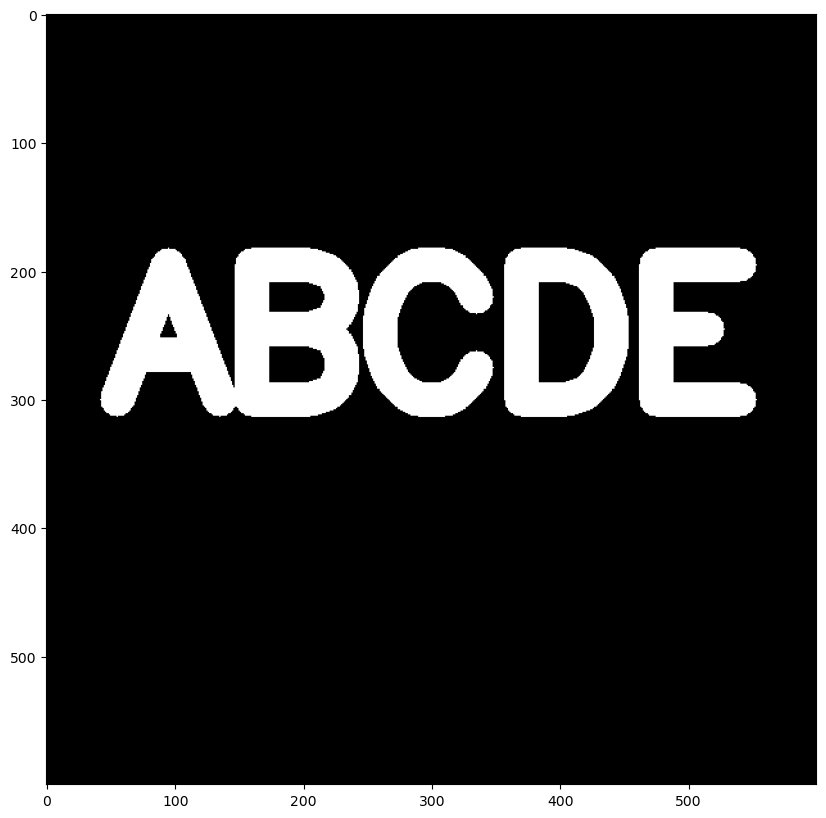

In [4]:
img = load_img()
display_img(img)

## Erosion
---
Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

In [5]:
kernel = np.ones((5,5), np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

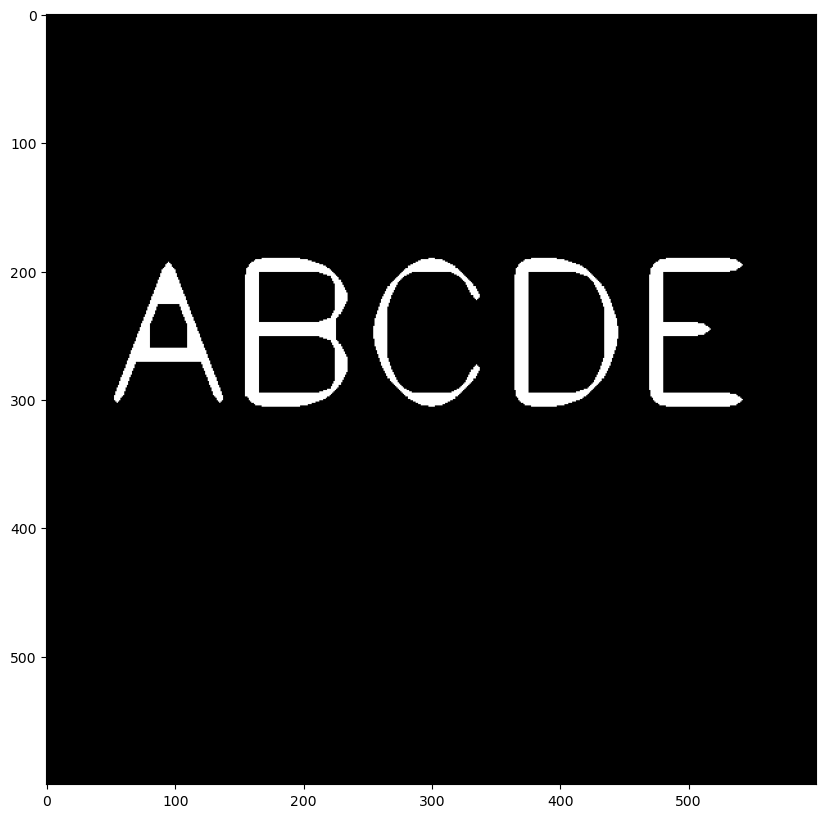

In [9]:
result = cv2.erode(img, kernel, iterations=4)
display_img(result)

## Opening
---
Opening is erosion followed by dilation. Useful in removing background noise!

In [10]:
img = load_img()

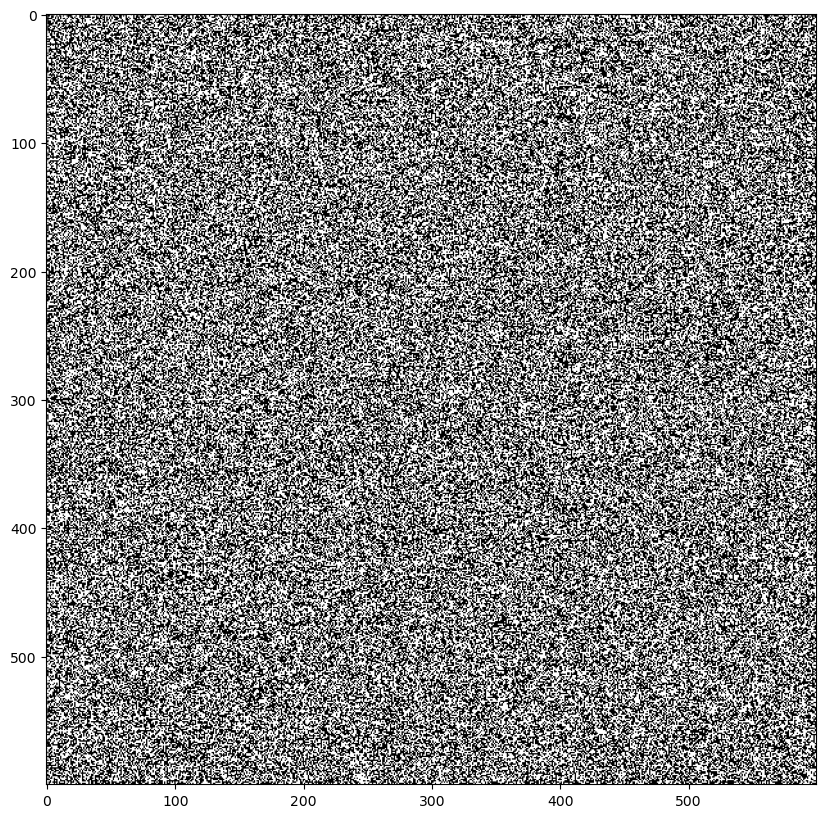

In [11]:
white_noise = np.random.randint(low=0, high=2, size=(600,600)) 
display_img(white_noise)

In [13]:
img.max()

255.0

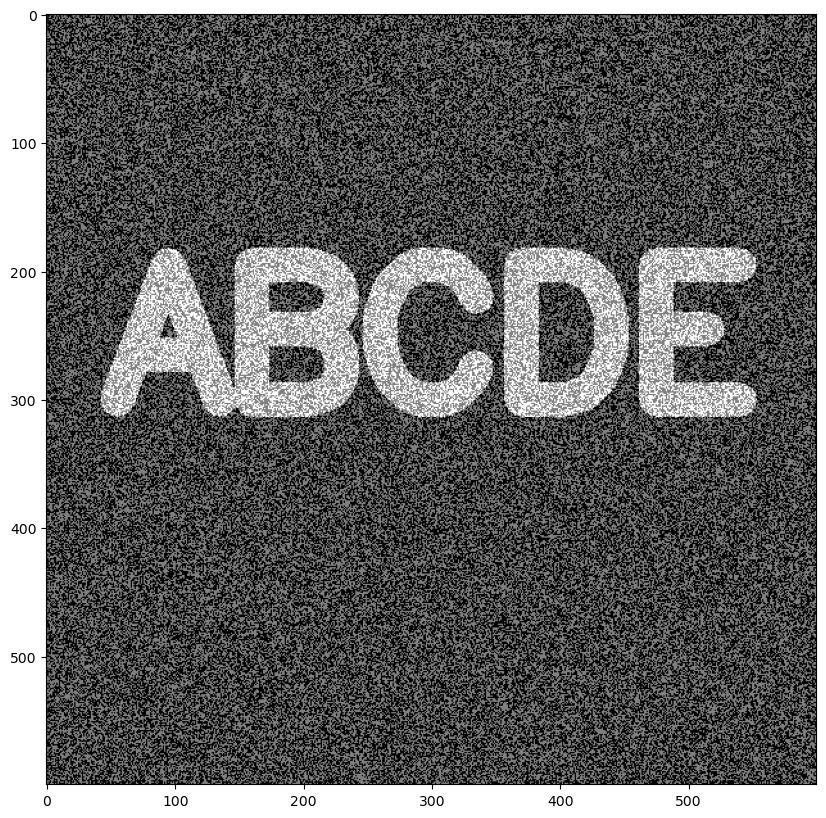

In [14]:
noise_img = white_noise * 255 + img
display_img(noise_img)

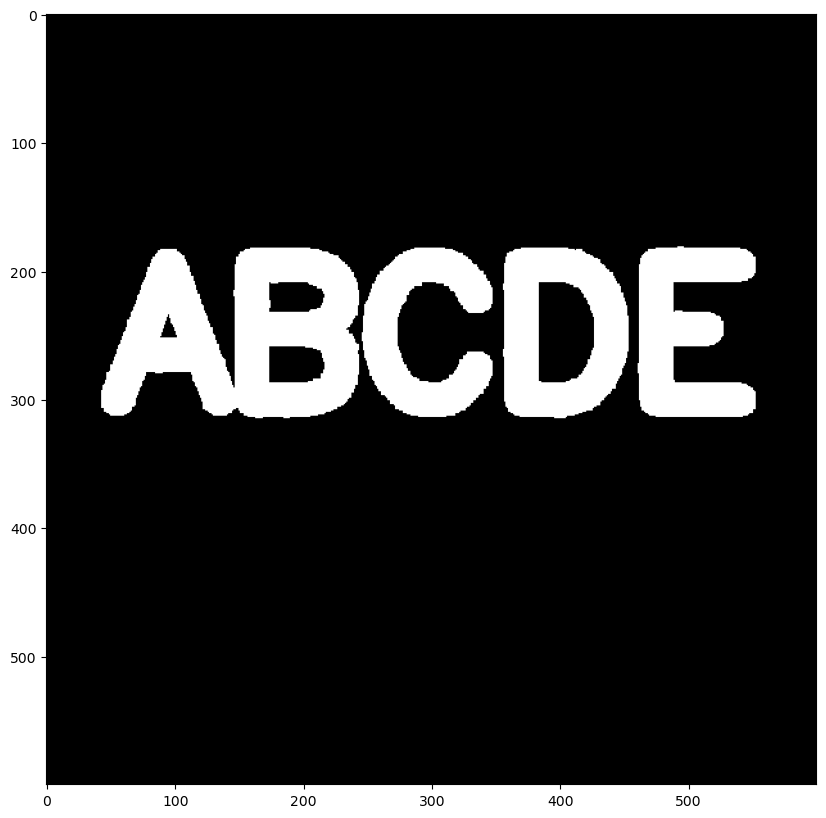

In [15]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

### Closing
---
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

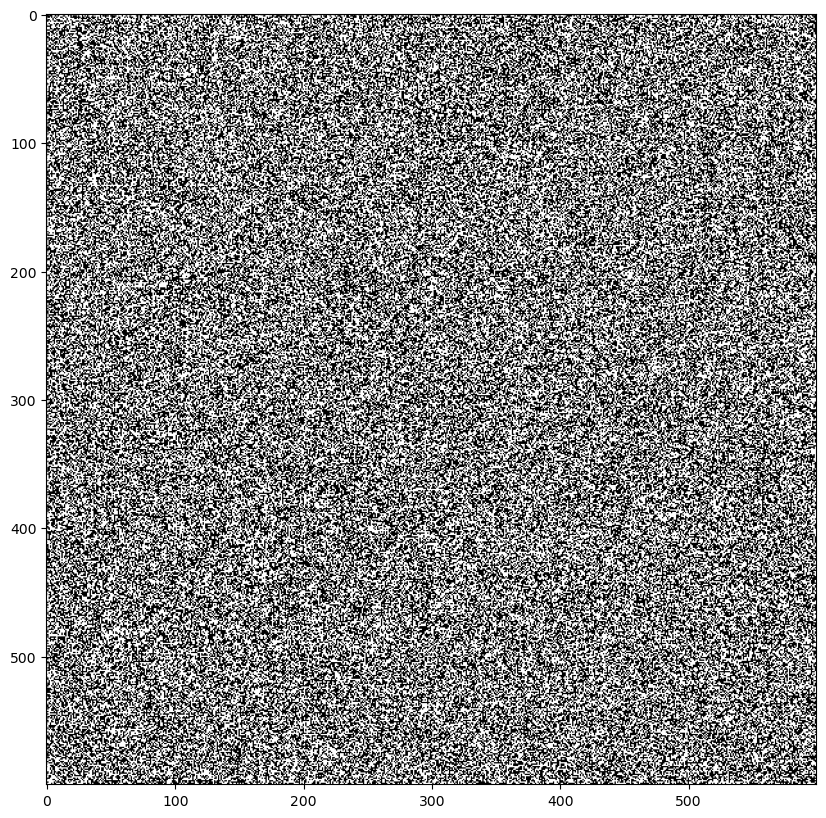

In [18]:
img = load_img()

black_noise = np.random.randint(0, 2, (600,600))
black_noise = black_noise * -255
display_img(black_noise)

In [19]:
black_noise_img = img + black_noise
black_noise_img

array([[-255., -255.,    0., ..., -255.,    0., -255.],
       [-255., -255., -255., ..., -255., -255., -255.],
       [   0., -255., -255., ...,    0., -255., -255.],
       ...,
       [   0.,    0.,    0., ..., -255., -255., -255.],
       [-255., -255.,    0., ..., -255., -255.,    0.],
       [-255.,    0.,    0., ...,    0.,    0., -255.]])

In [20]:
black_noise_img[black_noise_img == -255] = 0
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

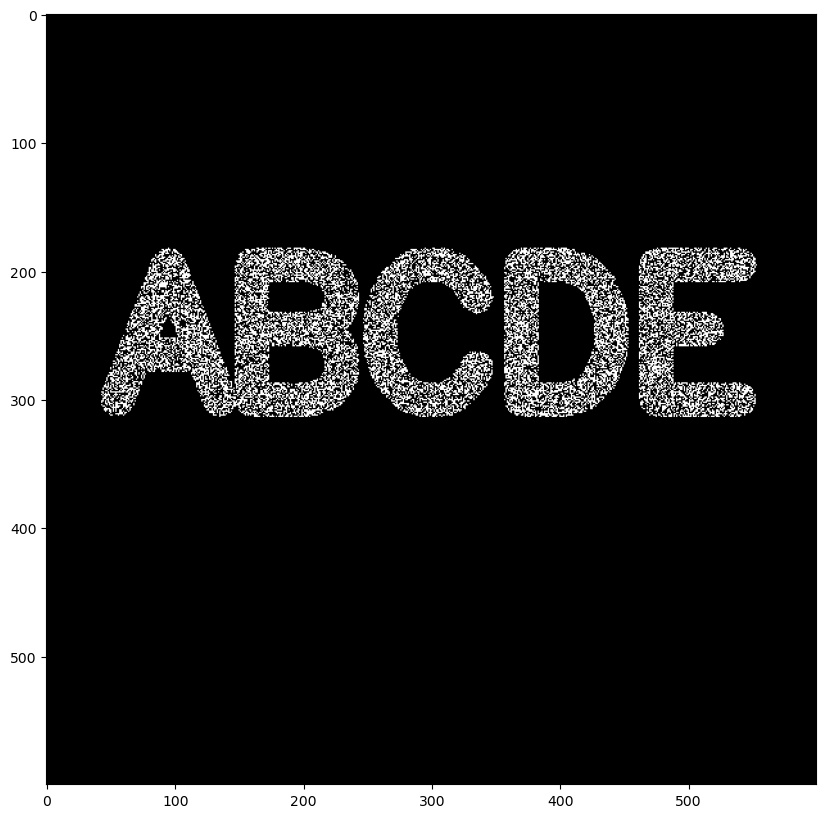

In [21]:
display_img(black_noise_img)

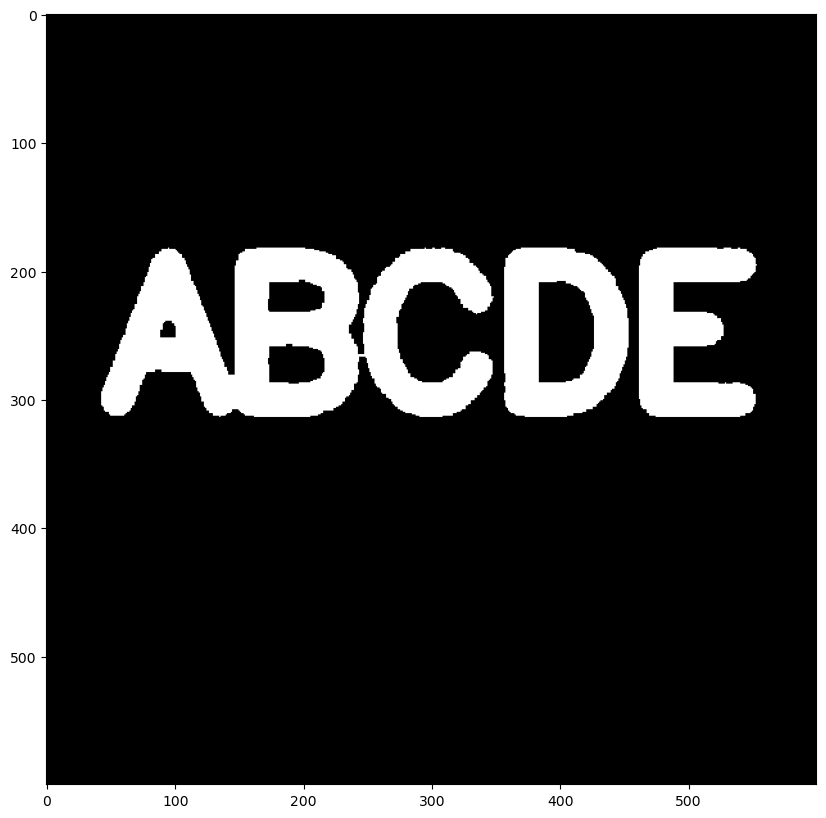

In [22]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

## Morphological Gradient
---
Difference between dilation and erosion of an image.

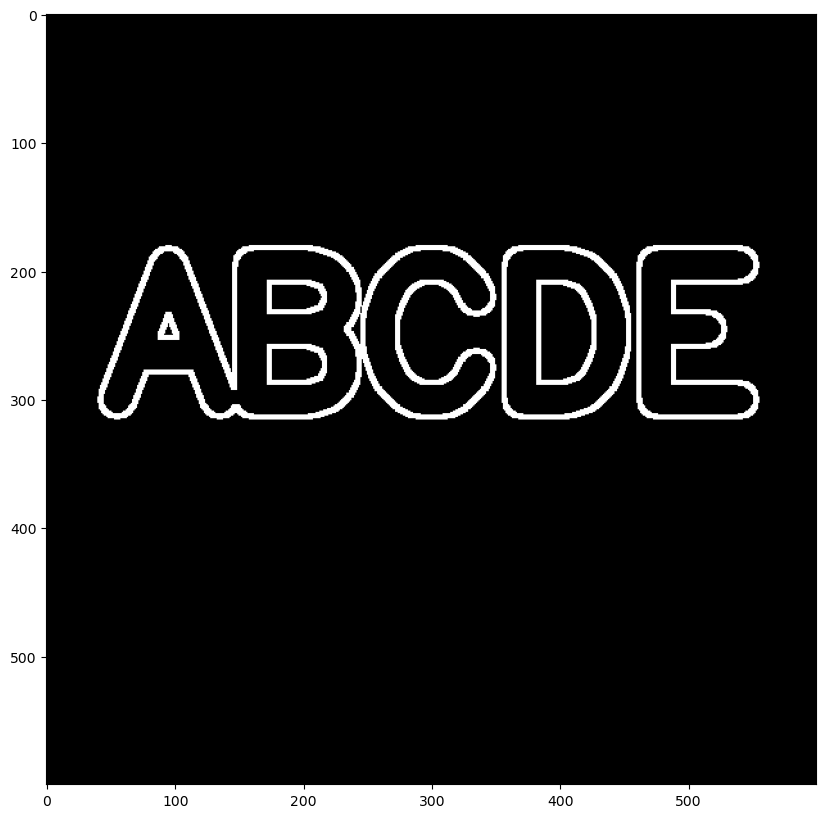

In [23]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)